## Customer Segmentation

In this project, we will analyze a dataset containing data on various customers' annual spending
amounts (reported in monetary units) of diverse product categories for internal structure. One goal of
this project is to best describe the variation in the different types of customers that a wholesale
distributor interacts with. Doing so would equip the distributor with insight into how to best structure
their delivery service to meet the needs of each customer.

### Load in Data

In [95]:
#import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn
# Import supplementary visualizations code visuals.py
from vpython import *
# Pretty display for notebooks
%matplotlib inline
import matplotlib.pyplot as plt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
#Load the wholesale customers datase
data = pd.read_csv("Wholesale customers data.csv")
data.drop(['Region', 'Channel'], axis = 1, inplace = True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Data Exploration

In [97]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


To get a better understanding of the customers and how their data will transform through the analysis,
it would be best to select a few sample data points and explore them in more detail.

In [159]:
# Select three indices of your choice you wish to sample from the dataset
np.random.seed(40)
indices = np.random.randint(0,1,3).tolist()
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:") 
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,12669,9656,7561,214,2674,1338
2,12669,9656,7561,214,2674,1338


In [99]:
data.apply(lambda col: col.drop_duplicates().reset_index(drop=True))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656.0,7561.0,214.0,2674.0,1338.0
1,7057,9810.0,9568.0,1762.0,3293.0,1776.0
2,6353,8808.0,7684.0,2405.0,3516.0,7844.0
3,13265,1196.0,4221.0,6404.0,507.0,1788.0
4,22615,5410.0,7198.0,3915.0,1777.0,5185.0
5,9413,8259.0,5126.0,666.0,1795.0,1451.0
6,12126,3199.0,6975.0,480.0,3140.0,545.0
7,7579,4956.0,9426.0,1669.0,3321.0,2566.0
8,5963,3648.0,6192.0,425.0,1716.0,750.0
9,6006,11093.0,18881.0,1159.0,7425.0,2098.0


In [100]:
data = data.fillna(0)

In [101]:
#Find percentile of purchases for sample customers
from scipy.stats import percentileofscore
pct_samples = pd.DataFrame()
for item in samples:
    pct_scores = []
    for customer in samples.index:
        pct_scores.append(round((percentileofscore(data[item], samples.loc[customer, item])),2))
        pct_samples[item] = pct_scores
print("Percentile scores of purchases for sample customers: ")
display(pct_samples)

ValueError: Length of values does not match length of index

In [160]:
new_data = data.drop('Grocery', axis=1)
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data,
data['Grocery'], test_size=0.25, random_state=42)
from sklearn.tree import DecisionTreeRegressor
# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
# Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print(score)

0.6818840085440834


Text(0.5,1,'Delicassen vs. Grocery Purchases')

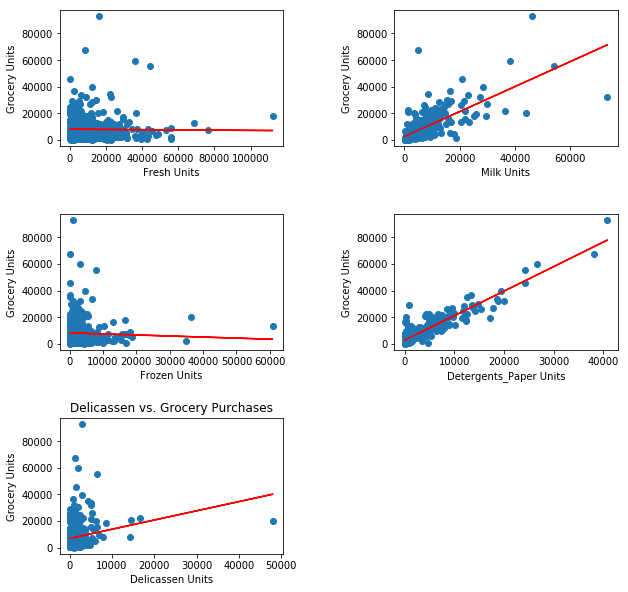

In [103]:
#Plot all categories vs Grocery purchases with trend line
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.5)
for i, item in enumerate(new_data):
    z = np.polyfit(new_data[item], data['Grocery'], 1)
    p = np.poly1d(z)
    plt.subplot(3,2,i+1)
    plt.scatter(x=new_data[item], y=data['Grocery'])
    plt.plot(new_data[item], p(new_data[item]), "r-")
    plt.xlabel(item + ' Units'), plt.ylabel('Grocery Units'),
plt.title(item + ' vs. Grocery Purchases')

In [104]:
# Find R^2 value (coefficient of determination) between other items and groceries
from scipy.stats import pearsonr
for category in new_data:
    correlation_coef = pearsonr(new_data[category], data['Grocery'])[0]
    print("Grocery and " + category + " R^2 value ={:.4f}".format(np.square(correlation_coef)))

Grocery and Fresh R^2 value =0.0001
Grocery and Milk R^2 value =0.5305
Grocery and Frozen R^2 value =0.0016
Grocery and Detergents_Paper R^2 value =0.8550
Grocery and Delicassen R^2 value =0.0422


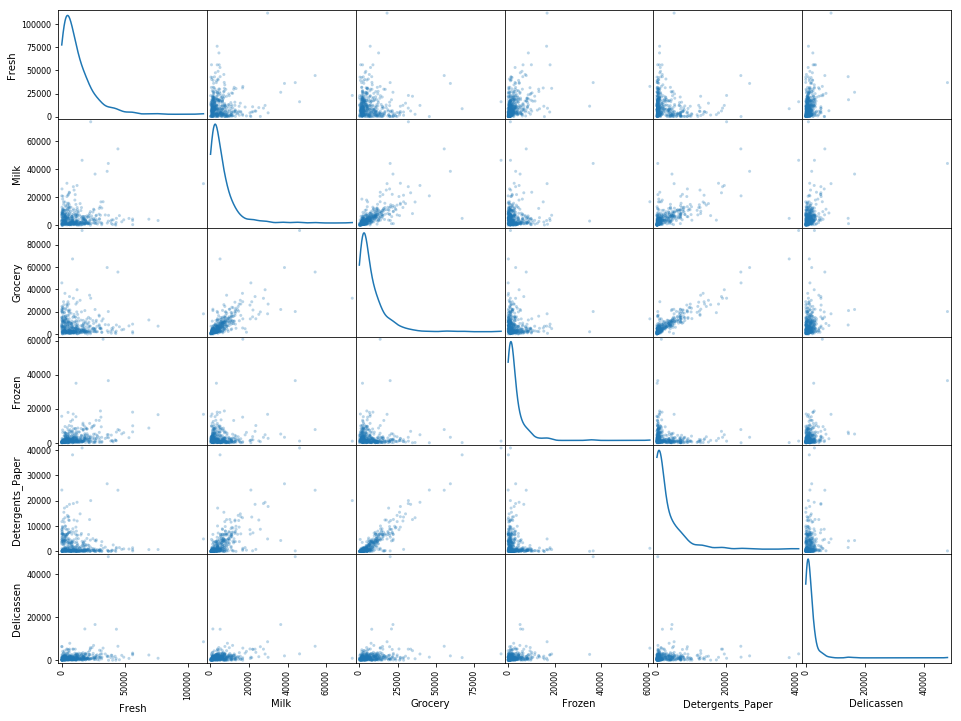

In [105]:
#Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (16,12), diagonal = 'kde');

In [106]:
print('Grocery and Detergents_Paper R^2 score = {:.4f}'.format(np.square(pearsonr(data['Grocery'], data['Detergents_Paper'])[0])))
print('Grocery and Milk R^2 score = {:.4f}'.format(np.square(pearsonr(data['Grocery'], data['Milk'])[0])))
print( 'Detergents_Paper and Milk R^2 score = {:.4f}'.format(np.square(pearsonr(data['Detergents_Paper'], data['Milk'])[0])))

Grocery and Detergents_Paper R^2 score = 0.8550
Grocery and Milk R^2 score = 0.5305
Detergents_Paper and Milk R^2 score = 0.4380


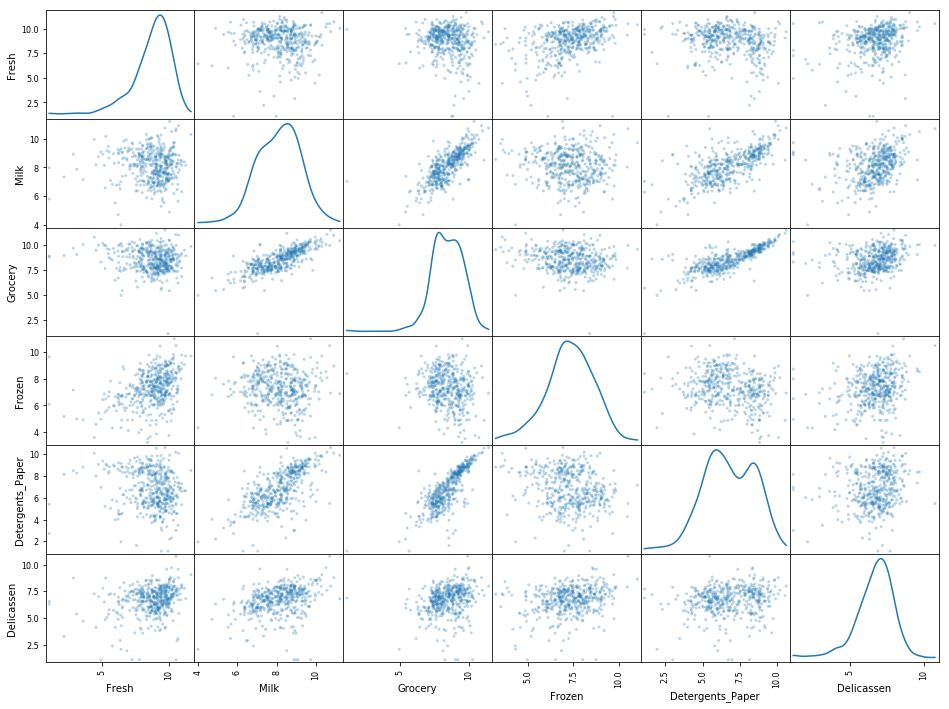

In [161]:
# Scale the data using the natural logarithm
log_data = np.log(data)
# Scale the sample data using the natural logarithm
log_samples = np.log(samples)
# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (16,12), diagonal ='kde');

In [108]:
#Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
2,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931


In [109]:
print('Grocery and Detergents_Paper R^2 score after transformation = {:.4f}'.format(np.square(pearsonr(log_data['Grocery'],
log_data['Detergents_Paper'])[0])))
print('Grocery and Milk R^2 score after transformation = {:.4f}'.format(np.
square(pearsonr(log_data['Grocery'], log_data['Milk'])[0])))
print( 'Detergents_Paper and Milk R^2 score after transformation = {:.4f}'.
format(np.square(pearsonr(log_data['Detergents_Paper'], log_data['Milk'])[0
])))

Grocery and Detergents_Paper R^2 score after transformation = 0.6342
Grocery and Milk R^2 score after transformation = 0.5759
Detergents_Paper and Milk R^2 score after transformation = 0.4596


In [162]:
#For each feature find the data points with extreme high or low values
outlier_list = []
for feature in log_data.keys():
# Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
# Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
# Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
# Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outlier_list.append(log_data[~((log_data[feature] >= Q1 - step) &
(log_data[feature] <= Q3 + step))].index.tolist())
# OPTIONAL: Select the indices for data points you wish to remove
outliers = []
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [111]:
#Flatten list of outliers and count occurences of each customer
outlier_list = [item for sublist in outlier_list for item in sublist]
# Add customer to outlier dictionary if they appear more than once
outlier_dict = {}
for i in outlier_list:
    if outlier_list.count(i) > 1:
        if i not in outlier_dict:
            outlier_dict[i] = outlier_list.count(i)

In [112]:
# Find percentile scores of all outliers
outlier_pct = pd.DataFrame(columns=data.columns)
for customer_num in outlier_dict.keys():
    pct_scores = []
    for category in data:
        pct_scores.append(round((percentileofscore(data[category], data.loc[
customer_num, category])),2))
    outlier_pct.loc[customer_num] = pct_scores
print("Outlier number of appearances: ")
print(outlier_dict)
print("\nPercentile scores of outliers: ")
display(outlier_pct)

Outlier number of appearances: 
{65: 2, 66: 2, 128: 2, 154: 3, 75: 2}

Percentile scores of outliers: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,1.59,96.14,99.09,0.68,99.32,65.68
66,0.68,25.23,64.77,6.14,71.82,2.50
128,2.27,82.50,44.32,5.45,55.68,0.57
154,7.73,0.23,0.45,2.50,0.91,1.36
75,82.50,17.27,0.23,79.77,0.34,50.45


In [113]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers = [154]
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

In [120]:
from sklearn.decomposition import PCA
# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)
# Generate PCA results plot


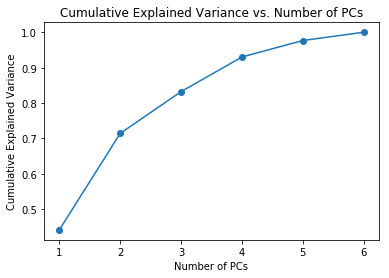

In [116]:
num_components = np.arange(1, 7)
cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)
plt.plot(num_components, cumulative_variance_explained, '-o');
plt.xlabel('Number of PCs'); plt.ylabel('Cumulative Explained Variance'); 
plt.title('Cumulative Explained Variance vs. Number of PCs');

In [93]:
#Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

NameError: name 'pca_results' is not defined

In [121]:
print("Percentile scores of sample customers: ")
display(pct_samples)

Percentile scores of sample customers: 


,Fresh
0,66.36


In [122]:
#Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)
#Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

In [123]:
#  Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)
# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [124]:
# Display sample log-data after applying PCA transformation in twodimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.7396,-0.1694
1,-1.7396,-0.1694
2,-1.7396,-0.1694


In [132]:
from mpl_toolkits.mplot3d import Axes3D

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map
    Source: https://gist.github.com/jakevdp/91077b0cae40f8f8244a"""

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return  plt.cm.get_cmap(base_cmap, N)

cmap = discrete_cmap(4, base_cmap = plt.cm.RdYlBu)



NameError: name 'name' is not defined

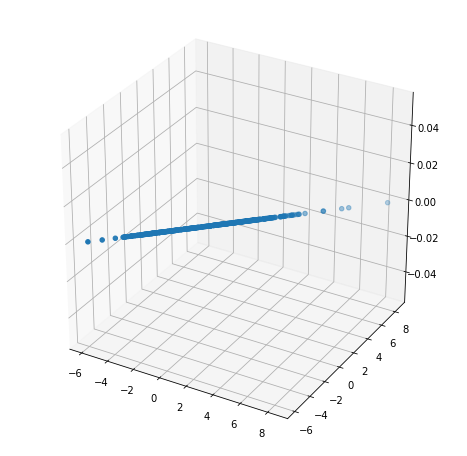

In [133]:
# Plot each method

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='3d')
    
p = ax.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 1'], 
                   cmap = cmap)
    
plt.title(f'{name.capitalize()}', size = 22)
fig.colorbar(p, aspect = 4, ticks = [1, 2, 3, 4])

### Clusters (Gaussian Mixture)

Clusters: 2; Silhouette Score = 0.4118
Clusters: 3; Silhouette Score = 0.4091
Clusters: 4; Silhouette Score = 0.2882
Clusters: 5; Silhouette Score = 0.1858
Clusters: 6; Silhouette Score = 0.3216
Clusters: 7; Silhouette Score = 0.2762
Clusters: 8; Silhouette Score = 0.3481
Clusters: 9; Silhouette Score = 0.3391
Clusters: 10; Silhouette Score = 0.3221


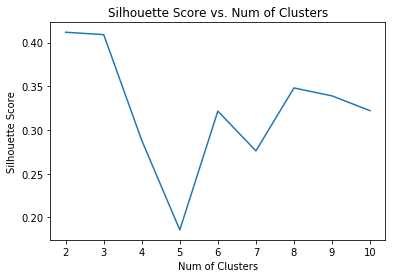

In [134]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
scores = []
for i in range(2, 11):
# TODO: Apply your clustering algorithm of choice to the reduced data
    n_clusters = i
    clusterer = GaussianMixture(n_components=n_clusters, random_state=42).fit(reduced_data)
# TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
# TODO: Find the cluster centers
    centers = clusterer.means_
# TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    scores.append(score)
    print('Clusters: {}; Silhouette Score = {:.4f}'.format(n_clusters, score))
plt.plot(np.arange(2,11), scores);
plt.xlabel('Num of Clusters'); plt.ylabel('Silhouette Score'); plt.title('Silhouette Score vs. Num of Clusters');

In [135]:
# Create clustering model with optimal number of components as measured bysilhouette score
clusterer = GaussianMixture(n_components=2, random_state=42)
# Fit to the processed data and make predictions
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)

In [146]:
reduced_data


,Dimension 1,Dimension 2
0,-1.739635,-0.169352
1,-1.735468,-0.946402
2,-1.782043,-1.748898
3,1.220857,-1.373284
4,-0.648243,-2.481736
5,-1.050333,-0.442547
6,-1.136716,0.135691
7,-1.513675,-1.034941
8,-0.893711,0.552857
9,-2.830720,-0.879318


In [136]:
sample_preds = clusterer.predict(pca_samples)
centers = clusterer.means_

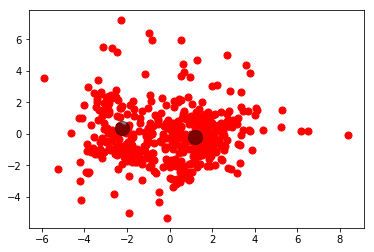

In [148]:
plt.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], c='red', s=50, cmap='viridis')

centers = clusterer.means_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [149]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)
# Exponentiate the centers
true_centers = np.exp(log_centers)
# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
print("Centers of clusters:")
display(true_centers)

Centers of clusters:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,3025.0,7483.0,12336.0,795.0,4577.0,854.0
Segment 1,9092.0,2241.0,2803.0,2079.0,379.0,762.0


In [154]:
centers_pct = pd.DataFrame(columns=data.columns)
for center in true_centers.index.tolist():
    pct_scores = []
for category in data:
    pct_scores.append(round((percentileofscore(data[category],true_centers.loc[center, category])),2))
centers_pct.loc[center] = pct_scores
print("Percentile scores of cluster centers: ")
display(centers_pct)

Percentile scores of cluster centers: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 1,52.5,35.91,34.32,58.41,33.86,42.73


In [158]:
#Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0
